###### https://community.qiskit.org/textbook/ch-algorithms/grover.html

In [32]:
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# Useful to present the result of any quantum algorithm
from qiskit.tools.visualization import plot_histogram as plth

#useful if you want to connect with real device
from qiskit.tools.monitor import backend_overview, job_monitor

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
def phase_oracle(circ, reg):
    circ.cz(qr[2],qr[0])
    circ.cz(qr[2],qr[1])

In [11]:
def n_controlled_Z(circ, controls, target):
    """Implement a Z gate with multiple controls"""
    if(len(controls) > 2):
        raise ValueError('The controlled Z with more than 2 controls is not implemented')
    elif(len(controls) == 1):
        circ.h(target)
        circ.cx(controls[0], target)
        circ.h(target)
    elif(len(controls) == 2):
        circ.h(target)
        circ.ccx(controls[0], controls[1], target)
        circ.h(target)

In [6]:
def inversion_about_average(circ, register, n, barriers):
    """Apply inversion about the average step of Grover's algorithm."""
    circ.h(register)
    circ.x(register)
    
    if barriers:
        circ.barrier()
    
    n_controlled_Z(circ, [register[j] for j in range(n-1)], register[n-1])
    
    if barriers:
        circ.barrier()
        
    circ.x(register)
    circ.h(register)   

##### Now we put the pieces together, with the creation of a uniform superposition at the start of the circuit and a measurement at the end. Note that since there are 2 solutions and 8 possibilities, we will only need to run one iteration.

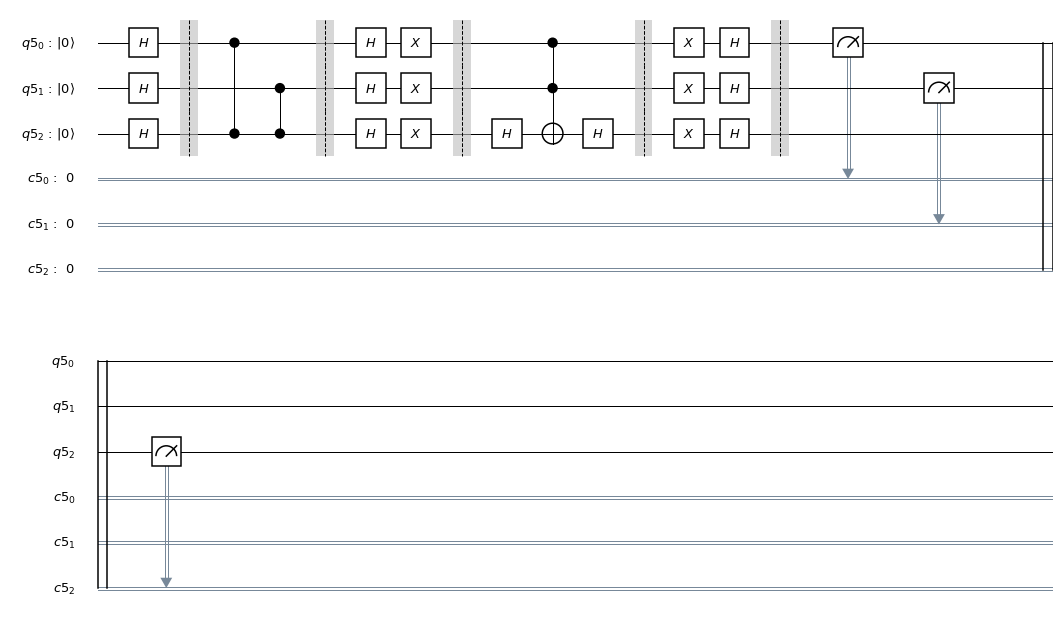

In [13]:
barriers = True

qr = QuantumRegister(3)
cr = ClassicalRegister(3)

groverCircuit = QuantumCircuit(qr, cr)
groverCircuit.h(qr)

if barriers:
    groverCircuit.barrier()
    
phase_oracle(groverCircuit, qr)

if barriers:
    groverCircuit.barrier()
    
inversion_about_average(groverCircuit, qr, 3, barriers)

if barriers:
    groverCircuit.barrier()

groverCircuit.measure(qr,cr)

groverCircuit.draw(output="mpl")

## Experiment with Simulators

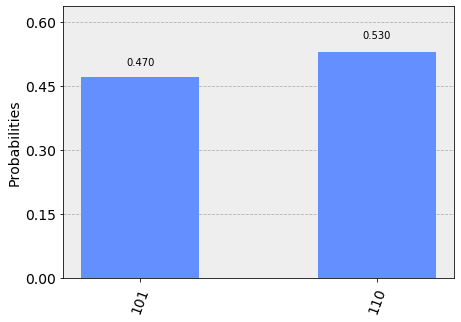

In [14]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(groverCircuit, backend=backend, shots=shots).result()
answear = results.get_counts()
plth(answear)

## Experiment with Real Devices

In [25]:
IBMQ.save_account('your_IBM_Q_id',overwrite = True)

In [37]:
IBMQ.load_account()
provider =  IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits <= 5 and not x.configuration().simulator and x.status().operational == True))

print("least busy backend: ", backend)
# backend_overview() # if you want to see all avaible IBM's devices

least busy backend:  ibmq_essex


C:\Users\Bartosz\Anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:547: DeprecationWarning: IBMQ.backends() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.backends() to find its backends.
  DeprecationWarning)


ibmq_essex                   ibmq_burlington              ibmq_london
----------                   ---------------              -----------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 1              Pending Jobs: 1              Pending Jobs: 76
Least busy:   True           Least busy:   False          Least busy:   False
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      94.4           Avg. T1:      92.4           Avg. T1:      71.8
Avg. T2:      158.7          Avg. T2:      74.1           Avg. T2:      69.8



ibmq_ourense                 ibmq_vigo                    ibmq_16_melbourne
------------                 ---------                    -----------------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  14
Pending Jobs: 179            Pending Jobs: 6              Pending Jobs: 37
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True 

In [38]:
shots = 1024
job = execute(groverCircuit, backend=backend, shots=shots)

job_monitor(job, interval = 2)

Job Status: job has successfully run


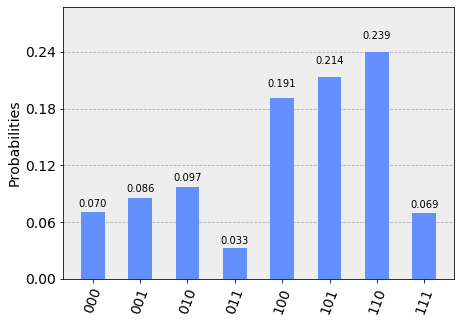

In [39]:
results = job.result()
answer = results.get_counts(groverCircuit)
plth(answer)